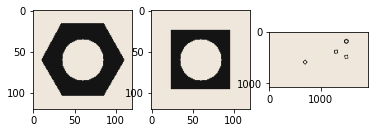

In [417]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Threshold value for hexnut is 20.0
Threshold value for squarenut is 20.0
Threshold value for conveyoris 20.0


Text(0.5, 1.0, 'conveyor_OTSU')

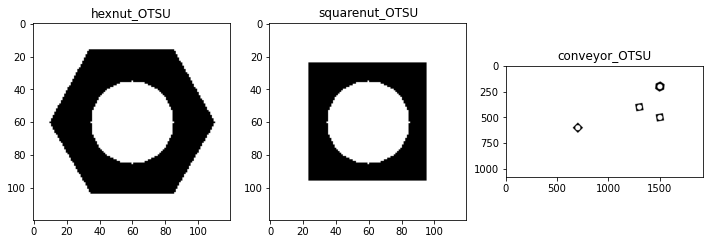

In [418]:
hexnut_template = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

ret1,th1 = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print("Threshold value for hexnut is",ret1)
print("Threshold value for squarenut is",ret2)
print("Threshold value for conveyoris",ret3)

fig,ax = plt.subplots(1,3,figsize=(12,10))
ax[0].imshow(th1,'gray')
ax[0].set_title('hexnut_OTSU')
ax[1].imshow(th2,'gray')
ax[1].set_title('squarenut_OTSU')
ax[2].imshow(th3,'gray')
ax[2].set_title('conveyor_OTSU')


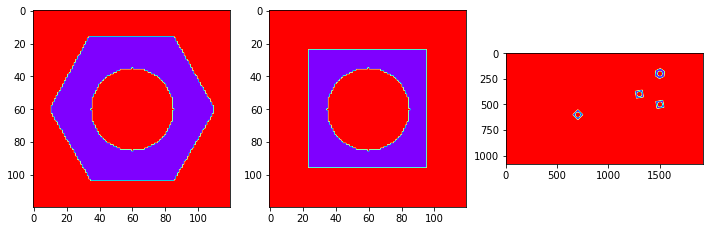

In [419]:
kernel = np.ones((3,3),np.uint8)
closing_hexnut = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing_squarenut = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing_conveyor = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig,ax = plt.subplots(1,3,figsize=(12,10))

ax[0].imshow(closing_hexnut,cmap='rainbow')
ax[1].imshow(closing_squarenut,cmap='rainbow')
ax[2].imshow(closing_conveyor,cmap='rainbow')

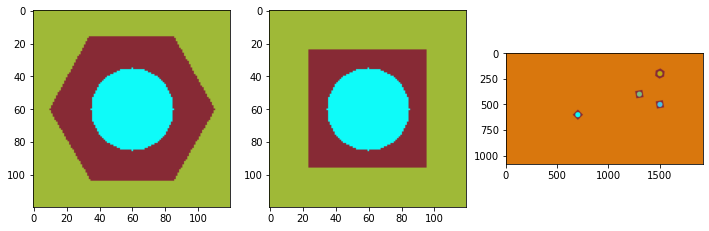

In [420]:
retval1, labels1, stats1, centeroids1 = cv.connectedComponentsWithStats(th1)
colormapped_hexnut = cv.applyColorMap((labels1/np.amax(labels1)*255).astype('uint8'),cv.COLORMAP_PARULA)

retval2, labels2, stats2, centeroids2 = cv.connectedComponentsWithStats(th2)
colormapped_squarenut = cv.applyColorMap((labels2/np.amax(labels2)*255).astype('uint8'),cv.COLORMAP_PARULA)

retval3, labels3, stats3, centeroids3 = cv.connectedComponentsWithStats(th3)
colormapped_conveyor = cv.applyColorMap((labels3/np.amax(labels3)*255).astype('uint8'),cv.COLORMAP_PARULA)

fig,ax = plt.subplots(1,3,figsize=(12,10))
ax[0].imshow(colormapped_hexnut)
ax[1].imshow(colormapped_squarenut)
ax[2].imshow(colormapped_conveyor)


In [484]:
stats1

array([[  10,   16,  101,   88, 4724],
       [   0,    0,  120,  120, 7715],
       [  35,   35,   51,   51, 1961]], dtype=int32)

(-0.5, 1919.5, 1079.5, -0.5)

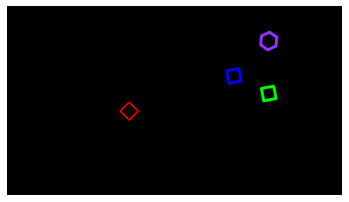

In [483]:
img = np.zeros((1080,1920,3),np.uint8)
contours, hierarchy = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours,7, (150,50,255), 15)
cv.drawContours(img, contours,1, (255,0,0), 8)
cv.drawContours(img, contours,3, (0,255,0), 15)
cv.drawContours(img, contours,5, (0,0,255), 15)
# cv.drawContours(th3, contours,0, (255,255,255), 10)
plt.imshow(img)
plt.axis('off')

9

In [436]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [525]:

ret, thresh = cv.threshold(hexnut_template, 127, 255,0)
ret, thresh2 = cv.threshold(conveyor_f100, 127, 255,0)
contours1,hierarchy1 = cv.findContours(thresh,2,1)
cnt1 = contours1[2]
contours2,hierarchy2 = cv.findContours(thresh2,2,1)

cnt2 = contours2[1]
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( ret )

0.00495626831213869


(-0.5, 119.5, 119.5, -0.5)

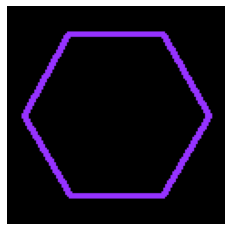

In [512]:
# img = np.zeros((hexnut_template.shape[0],hexnut_template.shape[1],3),np.uint8)
# contours1,hierarchy1 = cv.findContours(thresh,2,1)
# cv.drawContours(img, contours1,2, (150,50,255), 2)
# plt.imshow(img)
# plt.axis('off')